Tip
I advise you to focus particularly on:
Making sure you don’t print out more output than you need to.
Making your code readable and nicely formatted.
Thinking through your desired result before writing any code.

# Data Set-up
In this lab we’re going to be looking at avocado prices.

The data set comes to us from Kaggle and represents weekly retail scan data. A description of the data can be found ![here](https://www.kaggle.com/datasets/timmate/avocado-prices-2020)

Description of columns
The data set website is an updated data set from the original published in 2018. Please refer to the main page of the original data set for a description of the columns.

0. Import the data and declare your package dependencies.

In [1]:
import pandas as pd
import numpy as np

avo = pd.read_csv("lab2Data/avocado-updated-2020.csv")
avo
# Used unique to find all options for geography
# avo['geography'].unique()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


1. Briefly describe the data set. What information does it contain?

    This data set contains the sales of Hass avocados that come from different avocado retailors weekly. It then goes on to descibe the volume, price, bags used, type of avocado, and region of sale.

2. Clean the data in any way you see fit.

Warning
In particular, look carefully at the geography variable. Notice that the category "Los Angeles" is contained in "California", which is contained in "West", which is contained in "Total U.S.". Think about how you want to handle this issue in your analysis.

How many distinct geographical regions are there? Can you categorize them into different types of geographical regions (e.g. major regions, metro regions, etc.)? Will you create a new variable for this? A new data set for each?

You may also want to consider renaming variables so they make sense intuitively. For example, what does 4046 mean in terms of the size of avocados?

In [2]:
# Define a dictionary to map each geography to the five regions: Northeast, Southwest, West, Southeast, Midwest (also included national for U.S.)
region_mapping = {
    'Albany': 'Northeast',
    'Atlanta': 'Southeast',
    'Baltimore/Washington': 'Northeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'California': 'West',
    'Charlotte': 'Southeast',
    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Dallas/Ft. Worth': 'Southwest',
    'Denver': 'West',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest',
    'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Houston': 'Southwest',
    'Indianapolis': 'Midwest',
    'Jacksonville': 'Southeast',
    'Las Vegas': 'West',
    'Los Angeles': 'West',
    'Louisville': 'Southeast',
    'Miami/Ft. Lauderdale': 'Southeast',
    'Midsouth': 'Southeast',
    'Nashville': 'Southeast',
    'New Orleans/Mobile': 'Southeast',
    'New York': 'Northeast',
    'Northeast': 'Northeast',
    'Northern New England': 'Northeast',
    'Orlando': 'Southeast',
    'Philadelphia': 'Northeast',
    'Phoenix/Tucson': 'Southwest',
    'Pittsburgh': 'Northeast',
    'Plains': 'Midwest',
    'Portland': 'West',
    'Raleigh/Greensboro': 'Southeast',
    'Richmond/Norfolk': 'Southeast',
    'Roanoke': 'Southeast',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'South Carolina': 'Southeast',
    'South Central': 'Southwest',
    'Southeast': 'Southeast',
    'Spokane': 'West',
    'St. Louis': 'Midwest',
    'Syracuse': 'Northeast',
    'Tampa': 'Southeast',
    'Total U.S.': 'National',
    'West': 'West',
    'West Tex/New Mexico': 'Southwest'
}
# Create new column 'region' that pulls geographies from 'region_mapping' and assigns to a region
avo_cleaned = avo
avo_cleaned['region'] = avo_cleaned['geography'].map(region_mapping)

# Rename coulumns of PLU codes to respective sizes
avo_cleaned = avo_cleaned.rename(columns={'4046': 'small'})
avo_cleaned = avo_cleaned.rename(columns={'4225': 'large'})
avo_cleaned = avo_cleaned.rename(columns={'4770': 'xlarge'})

# Make sure date is in form to pinpoint day, month, or year
avo_cleaned['date'] = pd.to_datetime(avo_cleaned['date'])
avo_cleaned


,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,National
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Southwest



# Exercises
Note
Use your cleaned data set to answer these next three questions. In other words, avocado_clean is your starting “main subject” for each of question.

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [24]:
# filter by 2017
avo_2017 = avo_cleaned[avo_cleaned['date'].dt.year == 2017]
# drop unneded columns
avo_dropped = avo_2017.drop(columns=['date','average_price','total_volume','large','xlarge','total_bags','small_bags','large_bags','xlarge_bags','type','year','geography'])
avo_dropped = avo_dropped[avo_dropped['region'] != 'National']

# grouping by region, sum all volumes of small sized avocados
avo_grouped = avo_dropped.groupby('region').sum()
maxRegion = avo_grouped.loc[avo_grouped['small'].idxmax()]

print(f"Region: {maxRegion.name}, Small Avocados Volume: {maxRegion['small']:,.2f}")

Region: West, Small Avocados Volume: 355,628,417.01



4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [25]:
import calendar
# Split the date into month, day, and year
avo_cleaned['month'] = avo_cleaned['date'].dt.month
avo_cleaned['day'] = avo_cleaned['date'].dt.day
avo_cleaned['year'] = avo_cleaned['date'].dt.year

# Group by month and find mean for each
AvoMonth = avo_cleaned.groupby('month')['total_volume'].mean()

# Identify the month with the highest average volume
highestMonth = AvoMonth.idxmax()
highestMonthName = calendar.month_name[highestMonth]
highestAveVol = AvoMonth.max()

# Print the results
print(f"Month: {highestMonthName}, Mean Volume: {highestAveVol:,.2f}")


Month: May, Mean Volume: 1,123,632.25



5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

Region: West, Total Volume: 6,562,407,364.68


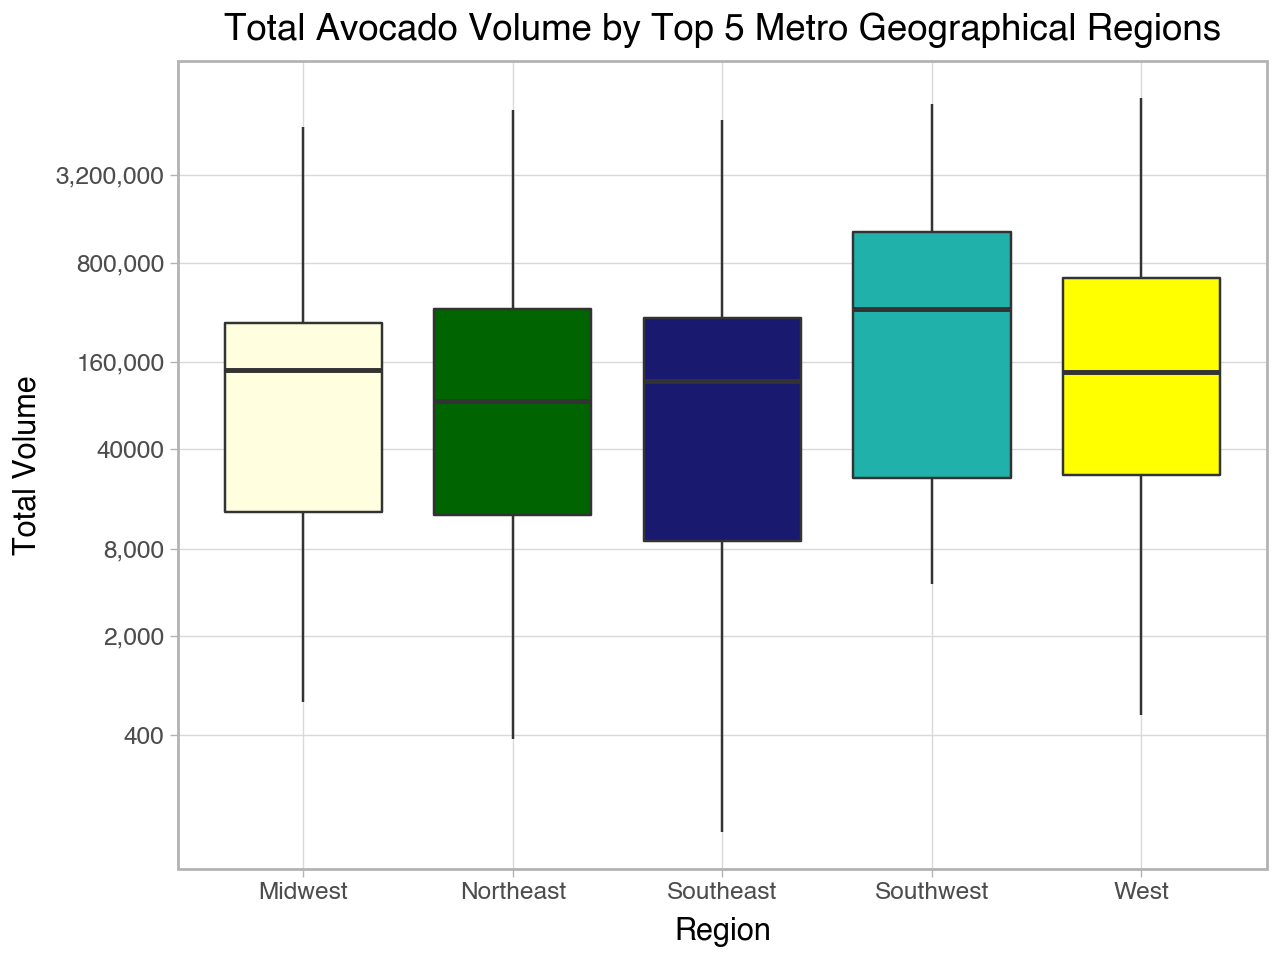

In [26]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme_light, scale_y_continuous, scale_fill_manual

custom_colors = {
    "Northeast": "darkgreen", 
    "Southeast": "midnightblue",
    "Southwest": "lightseagreen",
    "Midwest": "lightyellow",
    "West": "yellow"
}

# Drop the 'National' region
avo_dropped = avo_cleaned[avo_cleaned['region'] != 'National']
avo_dropped = avo_dropped.drop(columns=['date', 'type', 'geography'])

avo_grouped = avo_dropped.groupby('region').sum()
maxReg = avo_grouped.idxmax()
maxVol = avo_grouped.max()
print(f"Region: {maxReg['total_volume']}, Total Volume: {maxVol['total_volume']:,.2f}")


VolumeBoxPlot = (ggplot(avo_dropped, aes(x='region', y='total_volume', fill='region'))
        + geom_boxplot(show_legend=False)
        + labs(title='Total Avocado Volume by Top 5 Metro Geographical Regions',
               x='Region', y='Total Volume')
        + theme_light()
        + scale_y_continuous(
             trans= 'log',
             breaks=[np.exp(6), 2000, np.exp(9), 40000,  np.exp(12), 800000, np.exp(15)],
             labels=['400','2,000','8,000','40000','160,000','800,000','3,200,000'])
        + scale_fill_manual(values=custom_colors)
        )
VolumeBoxPlot.show()


Tip
You still want each individual observations in your plot, but you will need to somehow identify the average for each metro geographical region.

# Pivoting
The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [6]:
avo_cali = avo_cleaned[avo_cleaned['geography'].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]
avo_cali

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,West,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,West,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,West,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,West,11,29



7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

               difference
geography                
Los Angeles        161.50
Sacramento         177.02
San Diego          209.46
San Francisco      220.00

City: San Francisco, Greatest Difference: 220


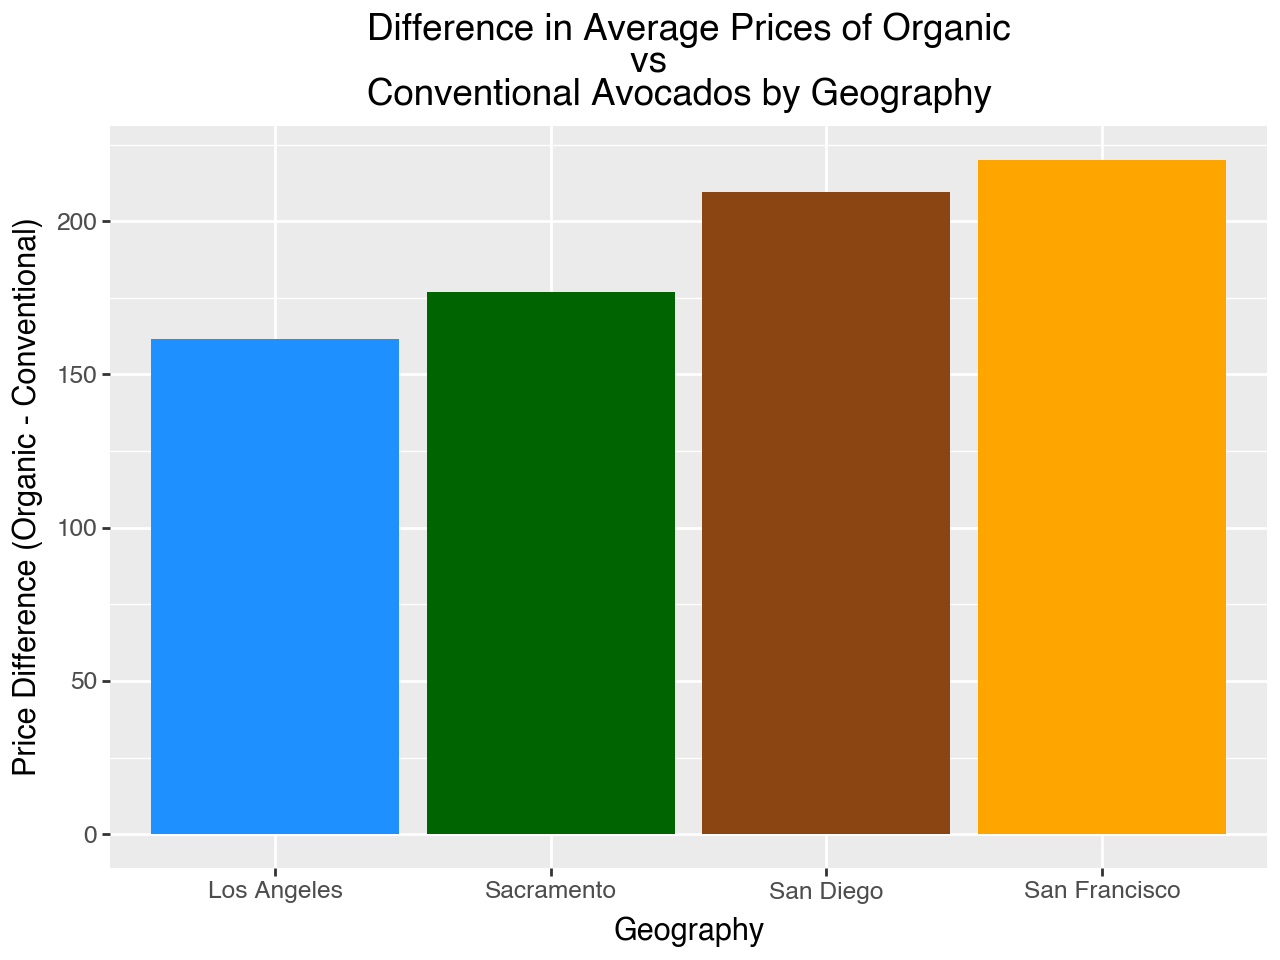

In [7]:
from plotnine import ggplot, geom_bar, aes

custom_coloring = {
    "Los Angeles": "dodgerblue",
    "San Diego":"saddlebrown",
    "San Francisco": "orange",
    "Sacramento": "darkgreen"
}

# Drop columns that will be problematic when summing
avo_cali_dropped = avo_cali.drop(columns=["date", "region"])

# Create two new DataFrames with only organic or conventional and group by geography
avo_cali_dropped_org = avo_cali_dropped[avo_cali_dropped['type'] == 'organic']
avo_cali_dropped_conv = avo_cali_dropped[avo_cali_dropped['type'] == 'conventional']
avo_cali_dropped_org_grouped = avo_cali_dropped_org.groupby("geography").sum()
avo_cali_dropped_conv_grouped = avo_cali_dropped_conv.groupby("geography").sum()

# Create new variable representing the difference in average prices
avo_cali_dropped_conv_grouped["difference"] = (
    avo_cali_dropped_org_grouped["average_price"] - 
    avo_cali_dropped_conv_grouped["average_price"]
)

# Drop columns to keep only price differnece variable
avo_diff = avo_cali_dropped_conv_grouped.drop(
    columns=['total_volume', 'total_bags', 'average_price', 
             'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year','month','day'])
print(avo_diff.drop(columns= ["small",'large', "xlarge"]))

# Find max difference
city_with_max_difference = avo_diff['difference'].idxmax()  # Index of the max difference
max_difference = avo_diff.loc[city_with_max_difference, 'difference']  # Access average price for that city
print(f"\nCity: {city_with_max_difference}, Greatest Difference: {max_difference:.0f}")

# Visualization
plotDiff = (
    ggplot(avo_diff.reset_index(), aes(x='geography', y='difference', fill= "geography")) +
    geom_bar(stat='identity', show_legend=False) + 
    scale_fill_manual(values=custom_coloring) +
    labs(title='Difference in Average Prices of Organic\n                          vs \nConventional Avocados by Geography',
         x='Geography',
         y='Price Difference (Organic - Conventional)')
)
plotDiff.show()


Tip
You do not have to, but you may want to transform your data. Sketch out what you want the data set to look like before you begin to code! Come up with a game plan to answer this question.

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

Tip
This will require transforming of your data! Sketch out what you want the data set to look like before you begin to code! I recommend starting with your California data set you create in Q6.

Plot to recreate

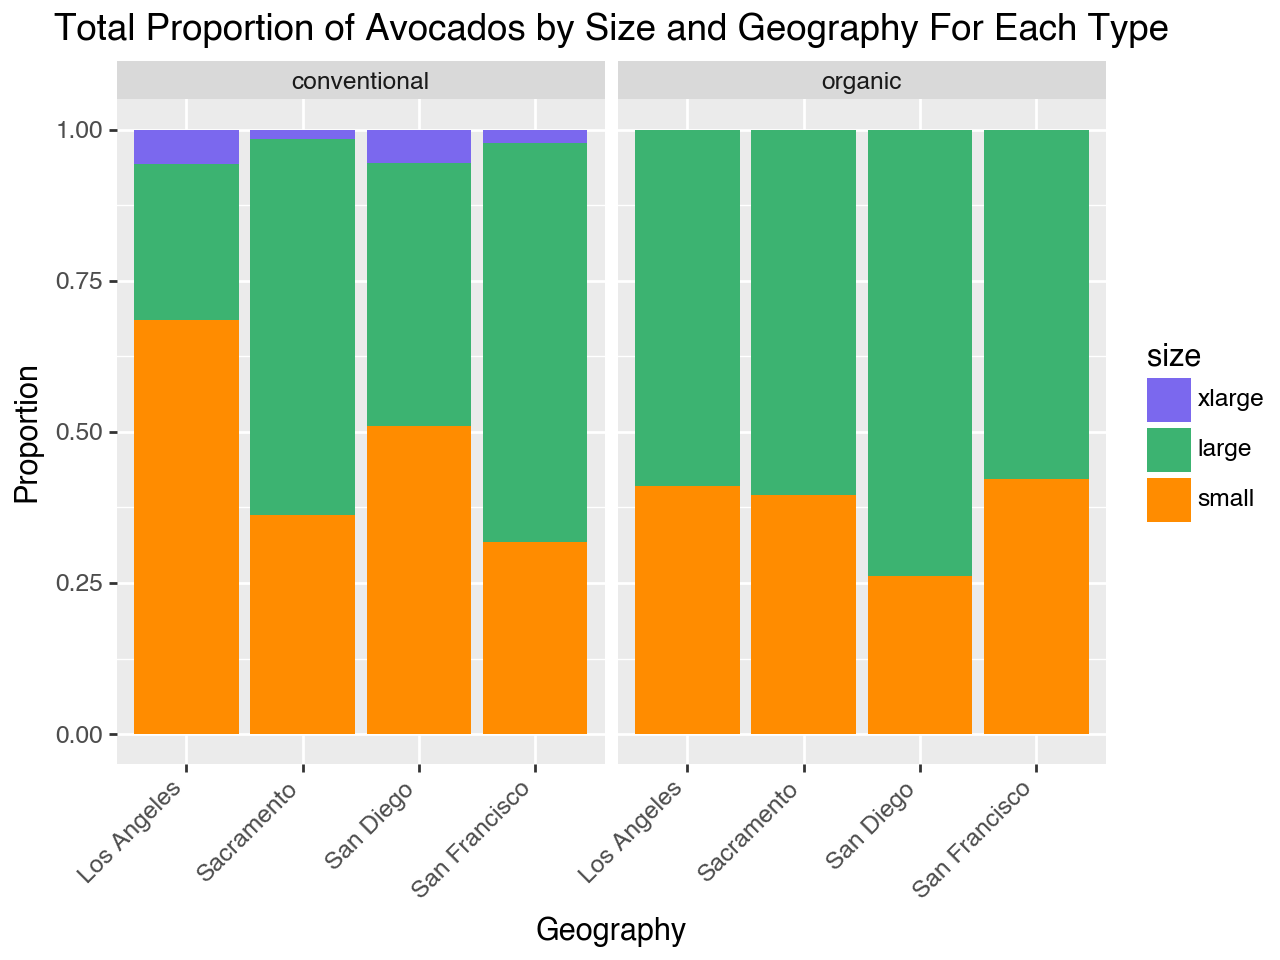

In [8]:
from plotnine import facet_wrap, theme, element_text, element_blank

# Melts the sizes into one column and adds a column represnting teh sum of all the sizes grouped by geography and type
avo_long = avo_cali_dropped.melt(id_vars=['geography', 'type', ], 
                                   value_vars=['small', 'large', 'xlarge'],
                                   var_name='size', 
                                   value_name='total_sales')

# Sum all sales for each geography, type, and size pairing
size_total = avo_long.groupby(['geography', 'type', 'size'])['total_sales'].sum().reset_index()
# Compute overall total sales for each geography regardless of size and type
overall_total = size_total.groupby(['geography', 'type'])['total_sales'].transform('sum')
# Calculate proportions by dividing total sales by overall total for each type
size_total['proportion'] = size_total['total_sales'] / overall_total
size_total['size'] = pd.Categorical(size_total['size'], categories=['xlarge', 'large', 'small'], ordered=True)

# Create the stacked bar plot with facets for organic and conventional
facetBar = (
    ggplot(size_total, aes(x='geography', y='proportion', fill='size')) +
    geom_bar(stat='identity', position='stack') + 
    facet_wrap('~type') + 
    labs(title='Total Proportion of Avocados by Size and Geography For Each Type', 
         x='Geography', 
         y='Proportion') +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    scale_fill_manual(values=[ 'mediumslateblue','mediumseagreen', 'darkorange'])
)
facetBar.show()

# Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

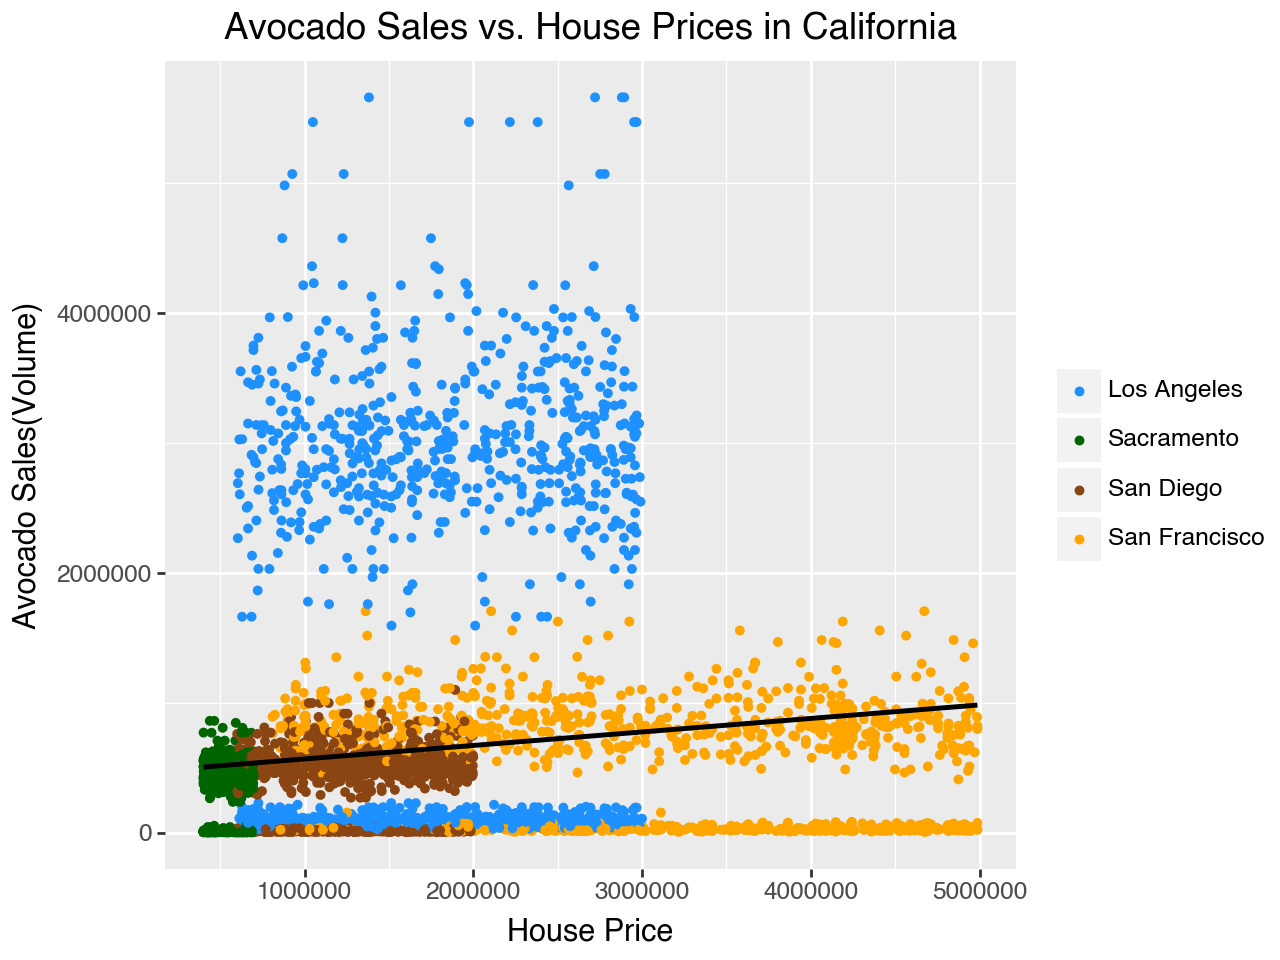

In [36]:
from plotnine import geom_point, geom_smooth, scale_color_manual

house_prices_list = []
for geo in avo_cali['geography']:
    if geo == "Los Angeles":
        house_price = np.random.randint(600000, 3000000)
    elif geo == "San Francisco":
        house_price = np.random.randint(800000, 5000000)
    elif geo == "San Diego":
        house_price = np.random.randint(600000, 2000000)
    else:
        house_price = np.random.randint(400000, 700000)
    house_prices_list.append({"geography": geo, "house_prices": house_price})

house_prices_df = pd.DataFrame(house_prices_list)
merged_data = pd.merge(avo_cali, house_prices_df, on='geography')

sample_data = merged_data.sample(n=5000)
avoHouse = (
    ggplot(sample_data, aes(x='house_prices', y='total_volume')) +
    geom_point(aes(color='geography'), size=1) + 
    geom_smooth(method='lm', se=False, color='black') + 
    labs(title='Avocado Sales vs. House Prices in California',
         x='House Price',
         y='Avocado Sales(Volume)') +
        scale_color_manual(values=custom_coloring) +
    theme(legend_title=element_blank())
)
avoHouse.show()


Here, we observe a house price data frame constructed using the average house price range across the four California cities. From the visualization, we can see a slight positive correlation between avocado volume sold and house prices. However, this relationship is not strong enough to definitively conclude that rising house prices lead to significant increases in avocado toast prices. 

Interestingly, Los Angeles stands out with an opposite trend, where the total volume of avocados sold significantly exceeds the predictions of the best-fit line. This suggests that avocado sales remain relatively constant across California cities, except in Los Angeles, where consumption of avocado toast may indeed be giving locals struggles when affording housing.